In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from pandas.plotting import table

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
oecddata = pd.read_csv("OECD STAT CSV.csv")
oecddata.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [4]:
oecddata.columns


Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [5]:
oecddata1 = oecddata[["Country", "Indicator", "Inequality", "Value"]]
len(oecddata1)

2368

In [6]:
oecddata2 = oecddata1.loc[oecddata["Inequality"] == "Total"]
len(oecddata2)

910

In [7]:
del oecddata2["Inequality"]
oecddata2.head()

,Country,Indicator,Value
0,Australia,Labour market insecurity,5.4
1,Austria,Labour market insecurity,3.5
2,Belgium,Labour market insecurity,3.7
3,Canada,Labour market insecurity,6.0
4,Czech Republic,Labour market insecurity,3.1


In [8]:
oecddata2["Indicator"].unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network',
       'Educational attainment', 'Student skills', 'Years in education',
       'Air pollution', 'Water quality', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [9]:
outputfile = oecddata2.to_csv("oecddatareduced0712.csv", encoding="utf-8", index=False)

In [10]:
shjoecddata = pd.read_csv("shjoecddata0712.csv")
happiness = pd.read_csv("Happiness20190713.csv")

In [11]:
happiness.head()

,Country,Indicator,Value
0,Finland,Ladder,1
1,Denmark,Ladder,2
2,Norway,Ladder,3
3,Iceland,Ladder,4
4,Netherlands,Ladder,5


In [13]:
shjmergedoecd = oecddata2.append(happiness)
shjmergedoecd

,Country,Indicator,Value
0,Australia,Labour market insecurity,5.4
1,Austria,Labour market insecurity,3.5
2,Belgium,Labour market insecurity,3.7
3,Canada,Labour market insecurity,6.0
4,Czech Republic,Labour market insecurity,3.1
5,Denmark,Labour market insecurity,4.2
6,Finland,Labour market insecurity,3.9
7,France,Labour market insecurity,7.6
8,Germany,Labour market insecurity,2.7
9,Greece,Labour market insecurity,29.8


In [14]:
shjoecddata0713 = shjmergedoecd.pivot(index="Country", columns="Indicator", values="Value")
shjoecddata0713

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
shjoecddata0713.columns

Index(['Air pollution', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Feeling safe walking alone at night',
       'Homicide rate', 'Household net adjusted disposable income',
       'Household net wealth', 'Housing expenditure',
       'Labour market insecurity', 'Ladder', 'Life expectancy',
       'Life satisfaction', 'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In [16]:
shjoecddata0713_drop = shjoecddata0713.dropna(how="any")
shjoecddata0713_drop

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5
Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,17.0,...,24336.0,92.0,1.6,53.0,2.7,524.0,14.90,64.0,84.0,17.7
Finland,6.0,0.5,88.0,3.81,70.0,85.1,1.3,29943.0,200827.0,23.0,...,42964.0,95.0,1.9,70.0,2.2,523.0,15.17,67.0,95.0,19.8
France,13.0,0.5,78.0,7.67,65.0,70.5,0.5,31304.0,280653.0,21.0,...,43755.0,90.0,1.8,66.0,2.1,496.0,16.36,75.0,81.0,16.5
Germany,14.0,0.2,87.0,4.26,75.0,72.5,0.5,34294.0,259667.0,20.0,...,47585.0,90.0,1.8,65.0,1.8,508.0,15.62,76.0,91.0,18.1
Italy,18.0,0.7,61.0,4.11,58.0,58.4,0.6,26588.0,279889.0,23.0,...,36658.0,92.0,1.4,71.0,2.5,485.0,16.47,73.0,71.0,16.6


In [17]:
columns = list(shjoecddata0713_drop.columns)

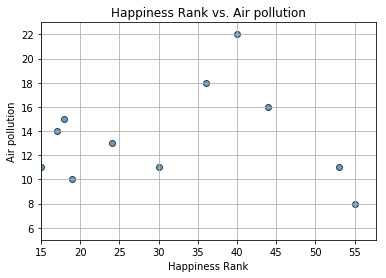

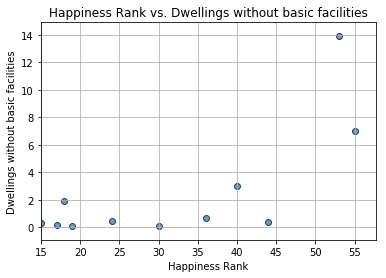

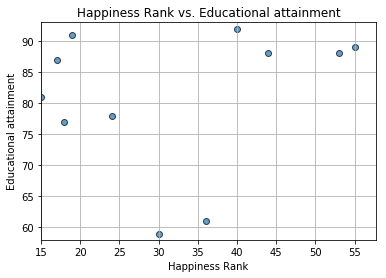

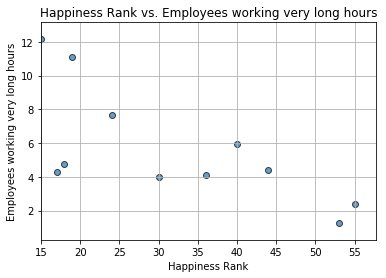

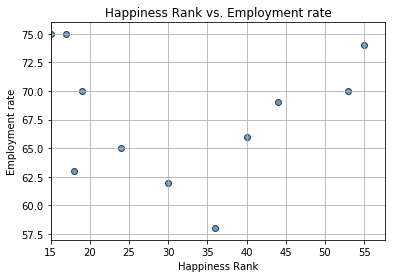

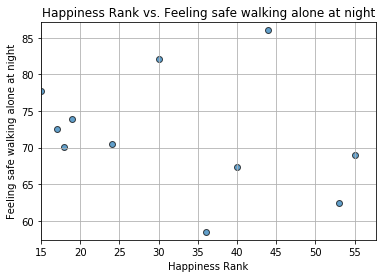

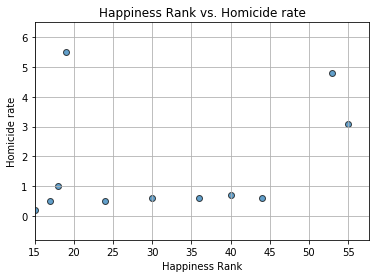

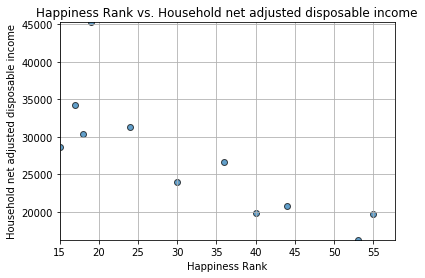

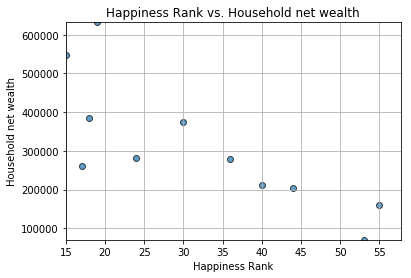

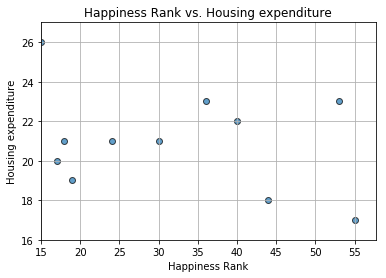

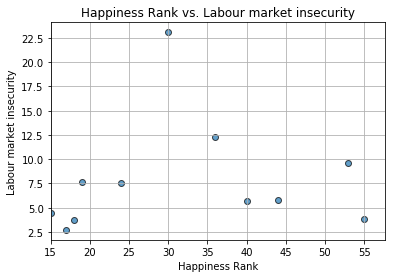

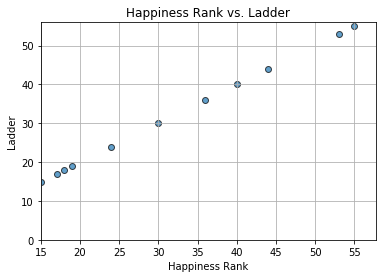

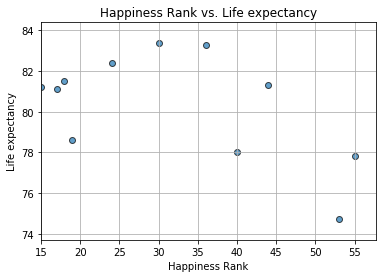

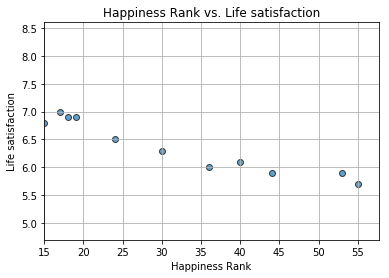

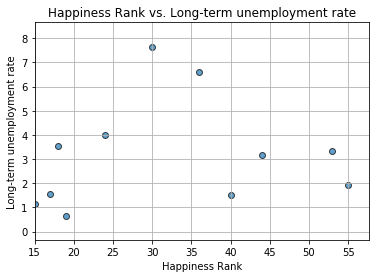

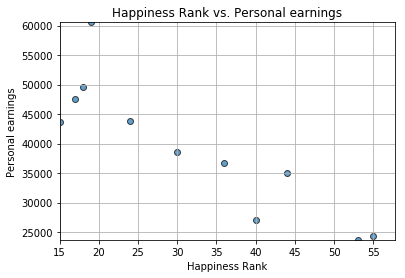

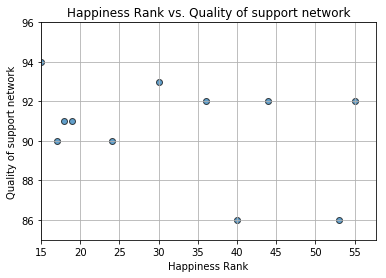

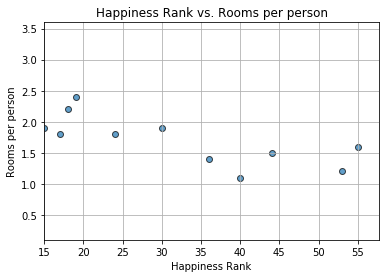

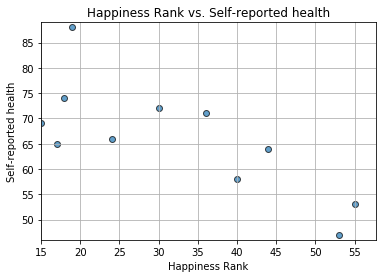

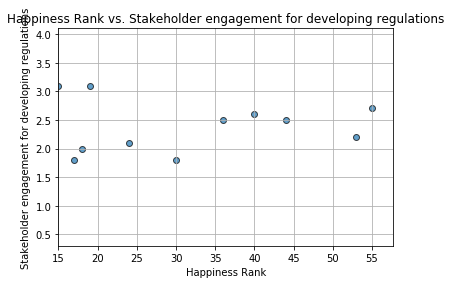

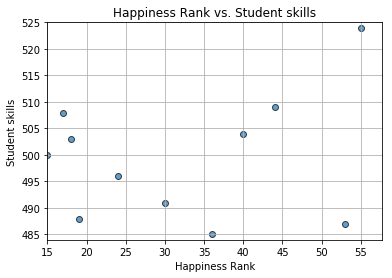

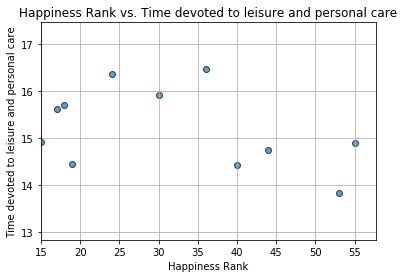

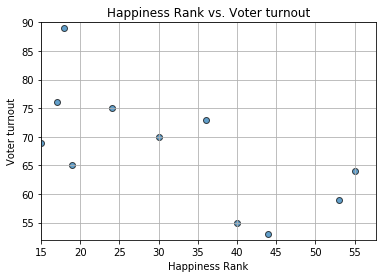

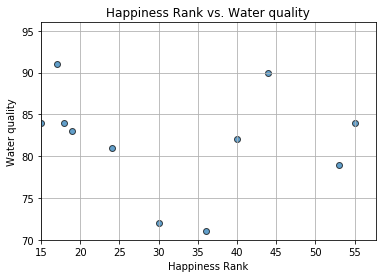

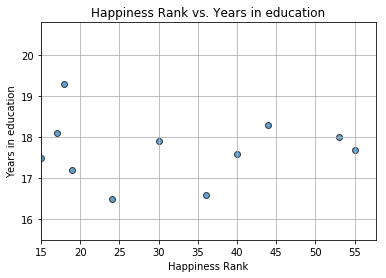

In [18]:
for indicator in columns:
    plt.scatter(shjoecddata0713_drop["Ladder"], shjoecddata0713_drop[indicator], edgecolor="black", alpha=0.7)
    plt.xlim(len(shjoecddata0713_drop))
    plt.ylim(min(shjoecddata0713_drop[indicator])-1, max(shjoecddata0713_drop[indicator])+1)
    plt.grid()

    plt.title(f"Happiness Rank vs. {indicator}")
    plt.xlabel("Happiness Rank")
    plt.ylabel(indicator)
    plt.show()
    

In [19]:
coefficient_list = []

for indicator in columns:
   coefficient = np.corrcoef(shjoecddata0713_drop["Ladder"], shjoecddata0713_drop[indicator])
   coefficient_list.append(coefficient[0][1])



In [20]:
coefficient_list

[0.33207229272519967,
 0.6618476278197067,
 -0.023330754041483315,
 -0.2815720616606455,
 -0.26626945733006085,
 -0.5687208621601628,
 0.3518261256204961,
 -0.711725318485186,
 -0.37042229410818384,
 -0.4055312064579128,
 0.2838310762106922,
 1.0,
 -0.5280068948340554,
 -0.971329582595287,
 0.34421218449148555,
 -0.8318445553328443,
 -0.6082998669140288,
 -0.6448009107857559,
 -0.6838882182604155,
 0.2027209389067686,
 -0.16156215622776357,
 -0.23729474432257674,
 -0.6196005374069079,
 -0.5786956335579398,
 -0.3102611981230716]

In [25]:
#creating a table of coefficients to show which are most correlated
coeff_pd = pd.DataFrame({"Factor":columns,"Coefficient":coefficient_list})
coeff_pd = coeff_pd.sort_values("Coefficient", axis = 0, ascending = True)
coeff_pd["Coefficient"] = round(coeff_pd["Coefficient"]*-1,2)
coeff_pd 


,Factor,Coefficient
13,Life satisfaction,0.97
15,Personal earnings,0.83
7,Household net adjusted disposable income,0.71
18,Self-reported health,0.68
17,Rooms per person,0.64
22,Voter turnout,0.62
16,Quality of support network,0.61
23,Water quality,0.58
5,Feeling safe walking alone at night,0.57
12,Life expectancy,0.53


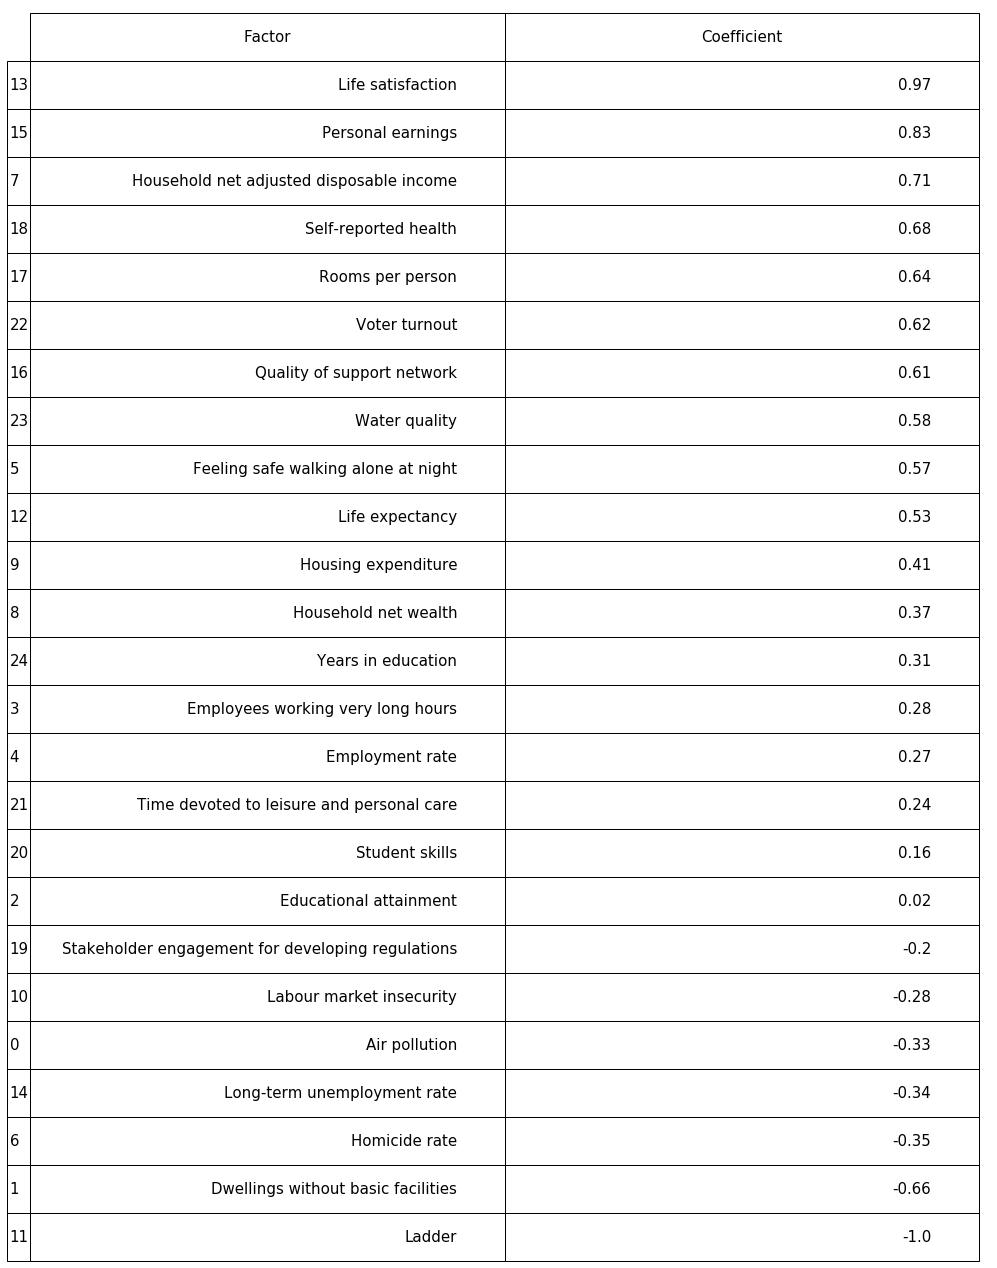

In [26]:

fig, ax = plt.subplots(figsize=(10, 6)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, coeff_pd, loc='upper right', colWidths=[0.17]*len(coeff_pd.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(15) # if ++fontsize is necessary ++colWidths
tabla.scale(5, 4) # change size table
plt.savefig('table1.png', transparent=True)



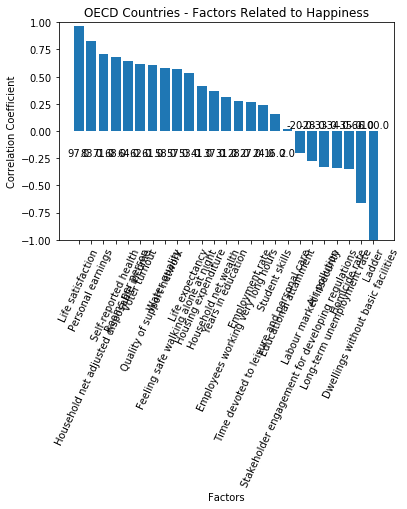

In [27]:
#Create bar graph of coefficients
summarybar = plt.bar(coeff_pd["Factor"],coeff_pd["Coefficient"])
plt.xlabel("Factors")
plt.ylabel("Correlation Coefficient")
plt.title("OECD Countries - Factors Related to Happiness")
plt.ylim(-1,1)
plt.xticks(coeff_pd["Factor"],rotation=65)

plt.plot(figsize = (10,10))


for bar in summarybar:
    height = bar.get_height()
    if height > 0:
        label_position=-0.25
    else:
        label_position = 0.01
    plt.text(bar.get_x()+bar.get_width()/2.,label_position,
            round(height*100,0),color='black',
            ha='center',va='bottom')

plt.tight_layout()
plt.savefig("OECD_countries_factors")